## Plot tumor purity prediction results

Here, we'll visualize the results of our tumor purity prediction. For now, we're trying to predict whether a given sample is above or below the median tumor purity (i.e. classification).

Results analyzed here are generated by the `run_purity_prediction.py` script.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir,
                   'purity_binarized_results',
                   'purity').resolve()

In [4]:
results_df = (
    au.load_purity_binarized_results(results_dir)
      .drop(columns=['identifier'])
)
print(results_df.shape)
results_df.head()

(144, 7)


,auroc,aupr,training_data,signal,seed,data_type,fold
0,0.84568,0.83164,me_27k,signal,42,train,0
1,0.84068,0.82634,me_27k,signal,42,test,0
2,0.81646,0.78189,me_27k,signal,42,cv,0
3,0.83720,0.81789,me_27k,signal,42,train,1
4,0.83476,0.80947,me_27k,signal,42,test,1


Text(0, 0.5, 'AUPR')

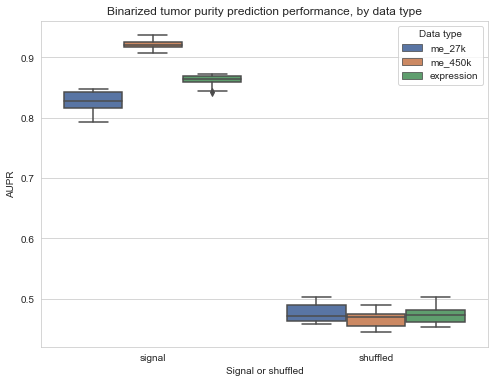

In [13]:
sns.set({'figure.figsize': (8, 6)})
sns.set_style('whitegrid')
plot_df = results_df[results_df.data_type == 'test']
sns.boxplot(data=plot_df, x='signal', y='aupr', hue='training_data')
plt.title('Binarized tumor purity prediction performance, by data type')
plt.legend(title='Data type')
plt.xlabel('Signal or shuffled')
plt.ylabel('AUPR')